In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## **Investigate High paying skills**

In [3]:
#only get data engineer job in india
df_DE_ind = df[(df['job_title_short'] == 'Data Engineer')&(df['job_country'] =='India')].copy()

#drop NaN values from plotting column
df_DE_ind = df_DE_ind.dropna(subset='salary_year_avg')

In [7]:
df_DE_ind = df_DE_ind.explode('job_skills')

In [12]:
df_DE_ind[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
2022,156500.0,java
2022,156500.0,t-sql
2022,156500.0,sql
2022,156500.0,azure
2022,156500.0,power bi
...,...,...
785395,64800.0,databricks
785395,64800.0,spark
785395,64800.0,power bi
785395,64800.0,tableau


In [25]:
df_DE_ind_grouped = df_DE_ind.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg', 'median'))

In [37]:
# first dataframe for TOP PAY
df_DE_ind_top_pay = df_DE_ind_grouped.sort_values(
    by='median_salary', ascending=False).head(10)
df_DE_ind_top_pay

,skill_count,median_salary
job_skills,,
dax,2,152000.0
t-sql,2,152000.0
numpy,4,151750.0
perl,2,151750.0
bigquery,12,147500.0
alteryx,1,147500.0
airflow,36,147500.0
kafka,44,147500.0
jupyter,5,147500.0


In [44]:
#second dataframe for TOP SKILLS
df_DE_ind_top_skill = df_DE_ind_grouped.sort_values(
    by='skill_count', ascending=False).head(10).sort_values(
    by='median_salary', ascending=False)
df_DE_ind_top_skill

,skill_count,median_salary
job_skills,,
sql,114,147500.0
python,99,147500.0
spark,84,147500.0
java,57,147500.0
hadoop,57,147500.0
nosql,49,147500.0
airflow,36,147500.0
kafka,44,147500.0
azure,52,140120.5


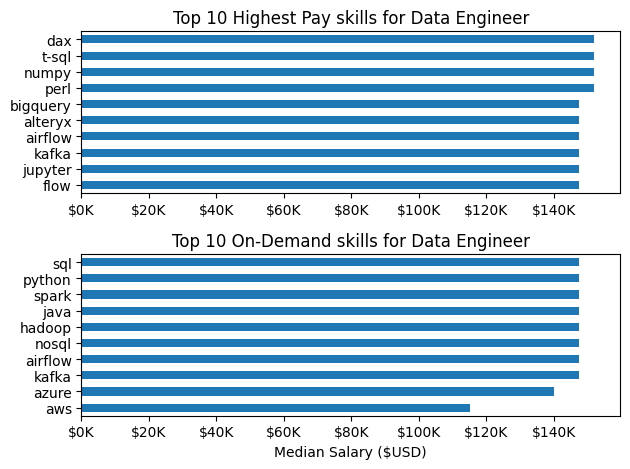

In [52]:
fig,ax = plt.subplots(2,1)

df_DE_ind_top_pay.plot(kind='barh',y='median_salary',ax=ax[0],legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Highest Pay skills for Data Engineer")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))

df_DE_ind_top_skill.plot(
    kind='barh', y='median_salary', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())        #get the same x axis values
ax[1].set_title('Top 10 On-Demand skills for Data Engineer')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))

fig.tight_layout()